# Demonstração de transformações lineares

Este notebook demonstra a criação e aplicação de duas matrizes de transformação:

1. Rotação horária de 90°

2. Cisalhamento (shear) na direção x

Primeiro importamos a biblioteca `matplotlib` para criar as visualizações gráfica e `numpy` para realizar os cálculos

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Definimos a função `plot_vector` para criar a visualização de vetores

In [15]:
def plot_vectors(title, vectors):
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    colors = ['magenta', 'orange']

    for i, (x, y) in enumerate(vectors):
        plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=colors[i])
        pos_x = x + 0.1
        pos_y = y + 0.1 if y >= 0 else y - 0.4
        plt.text(pos_x, pos_y, f"({x}, {y})", fontsize=12, color=colors[i])

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xticks(range(-5, 6))
    plt.yticks(range(-5, 6))

    plt.title(title)
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

## Vetores Unitários

Sabendo que a tranformação linear é uma função de multiplicação dos vetores unitários por uma matriz, temos:

$$\hat i = \begin{pmatrix}1 \\ 0
            
            \end{pmatrix}$$
$$\hat j = \begin{pmatrix}0 \\ 1
            
            \end{pmatrix}$$

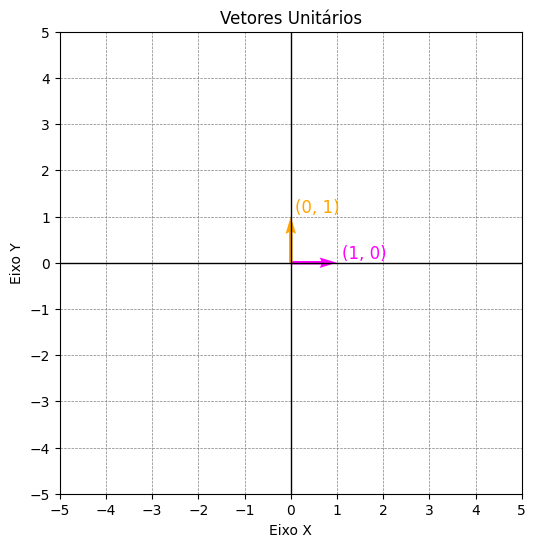

In [16]:
unit_vectors = [[1, 0], [0, 1]]

plot_vectors("Vetores Unitários", unit_vectors)

## Rotação em 90°

Ao rotacionar o vetor $\hat i$ em 90°, que está sobre o eixo X, ele passará a ficar sobre o eixo Y negativamente, obtendo:

$$\hat i' = \begin{bmatrix}0 \\ -1
            
            \end{bmatrix}$$

A lógica para o vetor B é semelhante, originalmente ele está sobre o eixo Y positivamente e ao aplicar a rotação, passa a ficar sobre o eixo X:

$$\hat j' = \begin{bmatrix}1 \\ 0
            
            \end{bmatrix}$$

Assim, para aplicar uma transformação linear de rotação horária de 90°, basta aplicar a matriz de transformação obtida a partir dos vetores unitários:

$$
M_r = \begin{bmatrix}0 & 1 \\
            
            -1 & 0\end{bmatrix}
            
$$

Note que após a rotação $\hat i' = -\hat j$ e $\hat j' = \hat i$

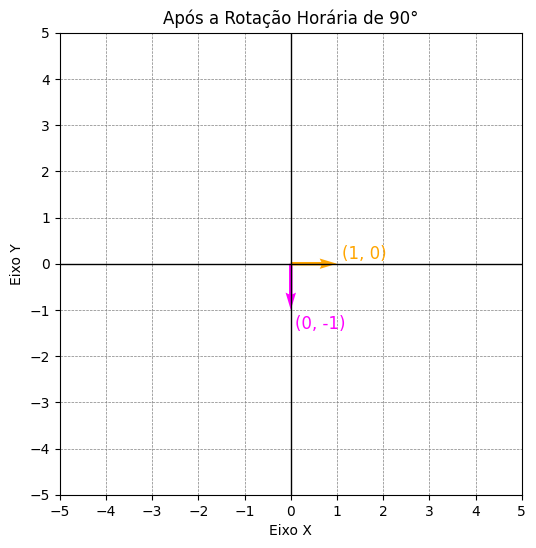

In [17]:
rotationed_unit_vectors = [[0, -1], [1, 0]]
plot_vectors("Após a Rotação Horária de 90°", rotationed_unit_vectors)

In [7]:
rotation_matrix = np.array([[0, 1], [-1, 0]])

### Exemplo

Usamos 2 vetores arbitrários e multiplicamos cada um pela matriz de rotação encontrada anteriormente para visualizar a transformação.

Matriz de Vetores Arbitrários:
[[ 4 -3]
 [ 2  1]]
Matriz de Vetores Arbitrários após Rotação Horária de 90°:
[[ 2  1]
 [-4  3]]


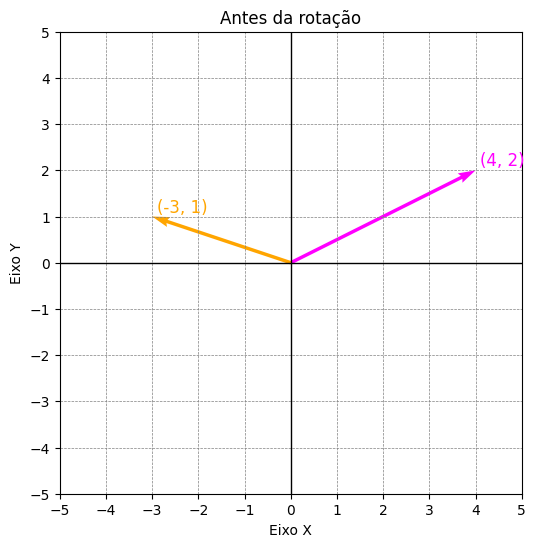

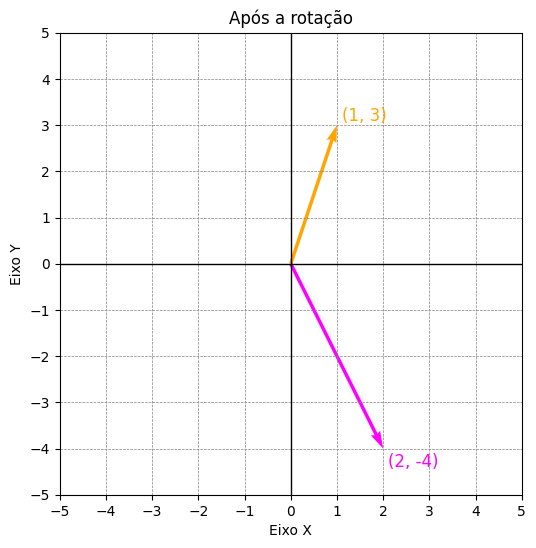

In [18]:
vectors = np.array([[4, 2], [-3, 1]])
rotationed_vectors = np.array([rotation_matrix @ vector for vector in vectors])

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários após Rotação Horária de 90°:")
print(rotationed_vectors.T)

plot_vectors('Antes da rotação', vectors)
plot_vectors('Após a rotação', rotationed_vectors)

## _Shear_

O deslocamento em $x$, ou cisalhamento horizontal, é uma transformação linear que leva um ponto genérico de coordenadas $(x, y)$ para o ponto $(x+my, y)$, onde $m$ é um parâmetro fixo, chamado **fator de cisalhamento**. Ou seja, essa transformação "inclina" o eixo $x$ proporcionalmente ao valor de $y$.

Sua matriz de transformação é dada por:

$$

M_s = \begin{bmatrix}1 & m \\
            
            0 & 1\end{bmatrix}        

$$

Fixando o valor de $m$ em 2, obtemos:

$$

M_s = \begin{bmatrix}1 & 2 \\
            
            0 & 1\end{bmatrix}     

$$

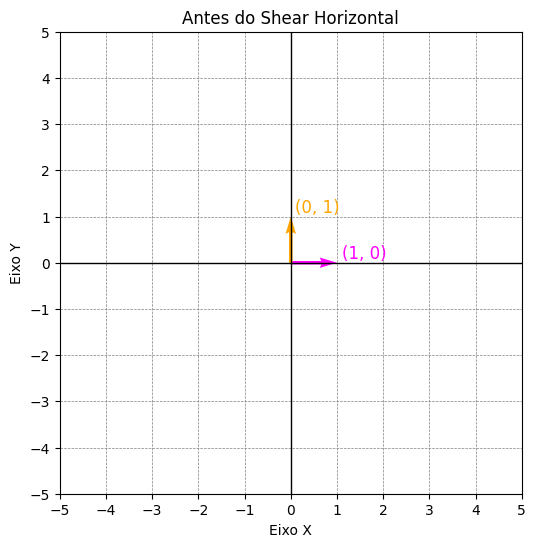

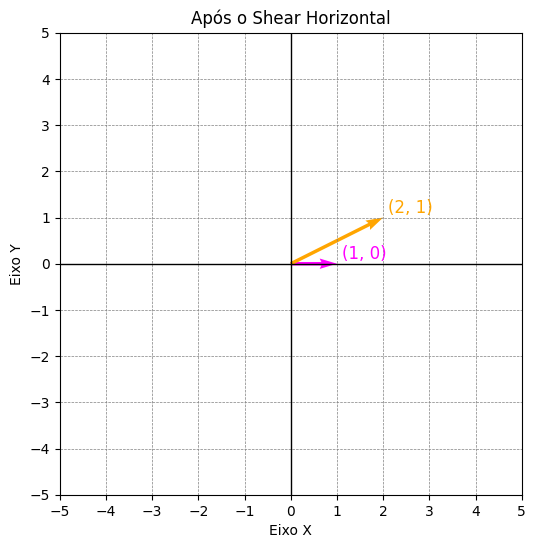

In [20]:
unit_vectors = [[1, 0], [0, 1]]
sheared_unit_vectors = [[1, 0], [2, 1]]

plot_vectors("Antes do Shear Horizontal", unit_vectors)
plot_vectors("Após o Shear Horizontal", sheared_unit_vectors)

In [21]:
def get_shear_matrix(k: float) -> np.ndarray:
    return np.array([[1, k], [0, 1]])

### Exemplo

Usamos 2 vetores arbitrários e multiplicamos cada um pela matriz de shear encontrada anteriormente para visualizar a transformação.

Matriz de Shear Horizontal (k = 2):
[[1 2]
 [0 1]]
Matriz de Vetores Arbitrários:
[[ 1  1]
 [ 1 -2]]
Matriz de Vetores Arbitrários após Shear Horizontal:
[[ 3 -3]
 [ 1 -2]]


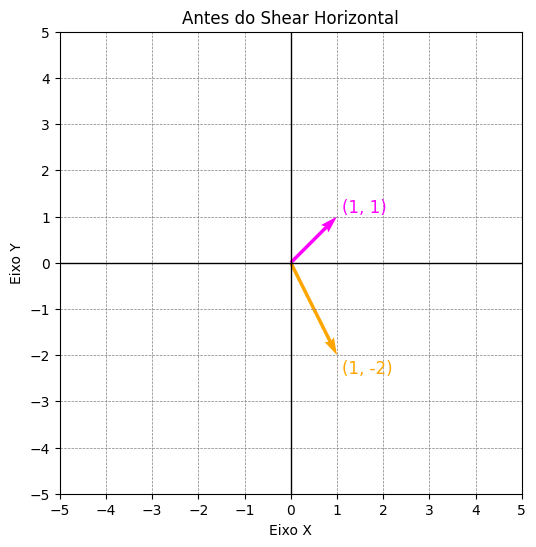

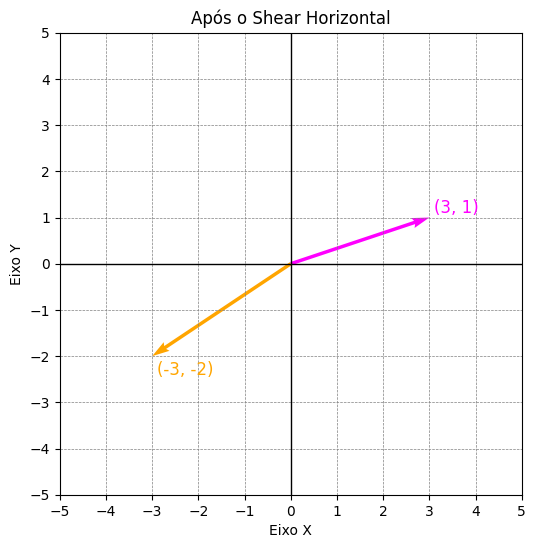

In [25]:
k = 2
shear_matrix = get_shear_matrix(k)

vectors = np.array([[1, 1], [1, -2]])
sheared_vectors = np.array([shear_matrix @ vector for vector in vectors])

print(f"Matriz de Shear Horizontal (k = {k}):")
print(shear_matrix)

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários após Shear Horizontal:")
print(sheared_vectors.T)

plot_vectors('Antes do Shear Horizontal', vectors)
plot_vectors('Após o Shear Horizontal', sheared_vectors)